In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
import seaborn as sns
from pathlib import Path

In [2]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

In [26]:
# results_path = "stead_phasenet/version_2"
# results_path = "stead_eqtransformer/version_0"
# results_path = "ethz_eqtransformer/version_0"
# results_path = "ethz_phasenet/version_0"
# results_path = "stead_gpd/version_1"
# results_path = "stead_cred/version_0"
results_path = "geofon_basicphaseae/version_0"

split = "dev"

# Task 1 - Event detection

In [27]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task1.csv")

pred["trace_type_bin"] = pred["trace_type"] == "earthquake"

Text(0, 0.5, 'true positive rate')

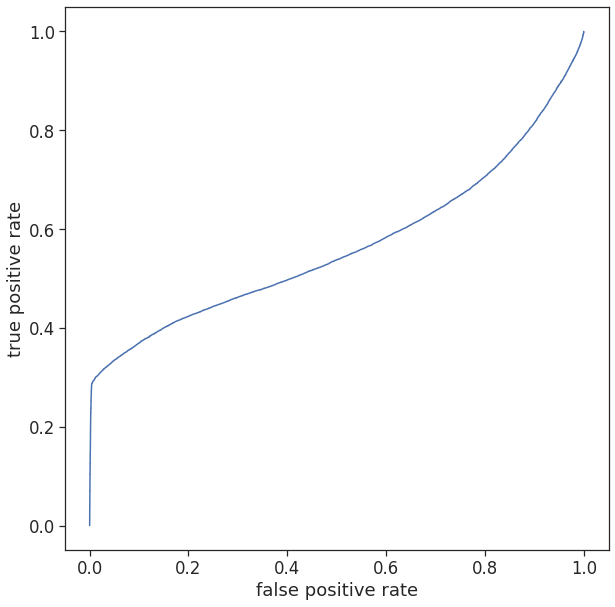

In [28]:
fpr, tpr, _ = roc_curve(pred["trace_type_bin"], pred["score_detection"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

Optimal F1: 0.6666907479651303
Optimal F1 threshold: 0.034419599999999995


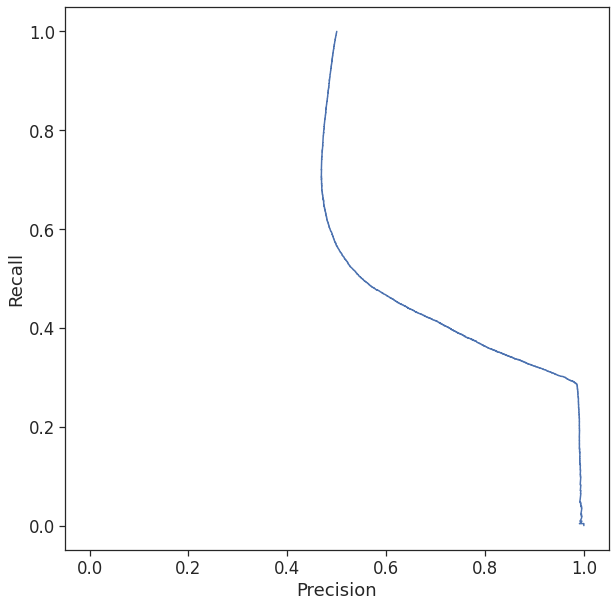

In [29]:
prec, recall, thr = precision_recall_curve(pred["trace_type_bin"], pred["score_detection"])

f1 = 2 * prec * recall / (prec + recall)
f1_threshold = thr[np.nanargmax(f1)]
best_f1 = np.max(f1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(prec, recall)
ax.set_aspect("equal")

ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_xlim(ax.get_ylim())

print("Optimal F1:", best_f1)
print("Optimal F1 threshold:", f1_threshold)

# Task 2 - Phase identification

In [30]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task23.csv")
pred["phase_label_bin"] = pred["phase_label"] == "P"

Text(0, 0.5, 'true positive rate')

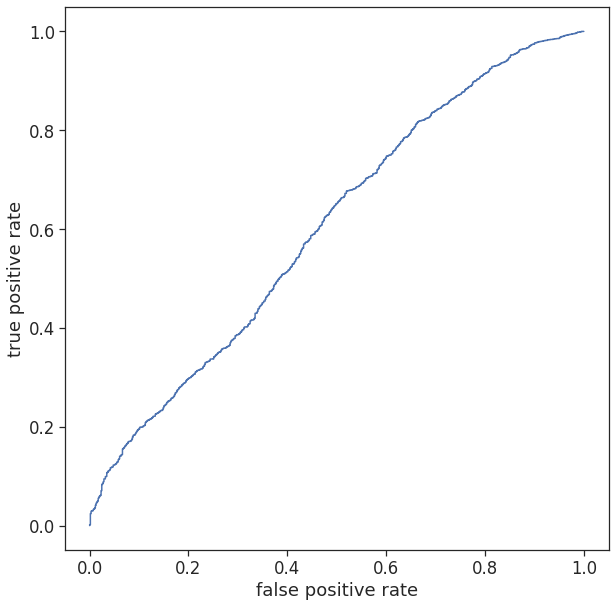

In [31]:
fpr, tpr, _ = roc_curve(pred["phase_label_bin"], pred["score_p_or_s"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

Optimal F1: 0.9879698462716968
Optimal F1 threshold: 46.3752


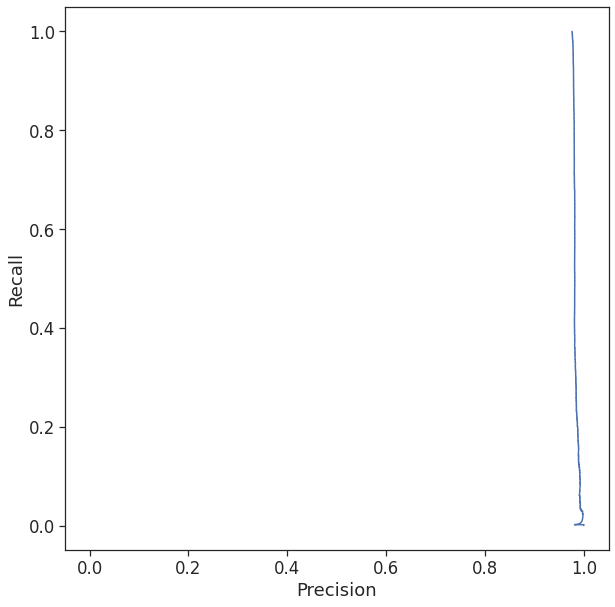

In [32]:
prec, recall, thr = precision_recall_curve(pred["phase_label_bin"], pred["score_p_or_s"])

f1 = 2 * prec * recall / (prec + recall)
f1_threshold = thr[np.nanargmax(f1)]
best_f1 = np.max(f1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(prec, recall)
ax.set_aspect("equal")

ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_xlim(ax.get_ylim())

print("Optimal F1:", best_f1)
print("Optimal F1 threshold:", f1_threshold)

# Task 3 - Onset determination

In [33]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task23.csv")

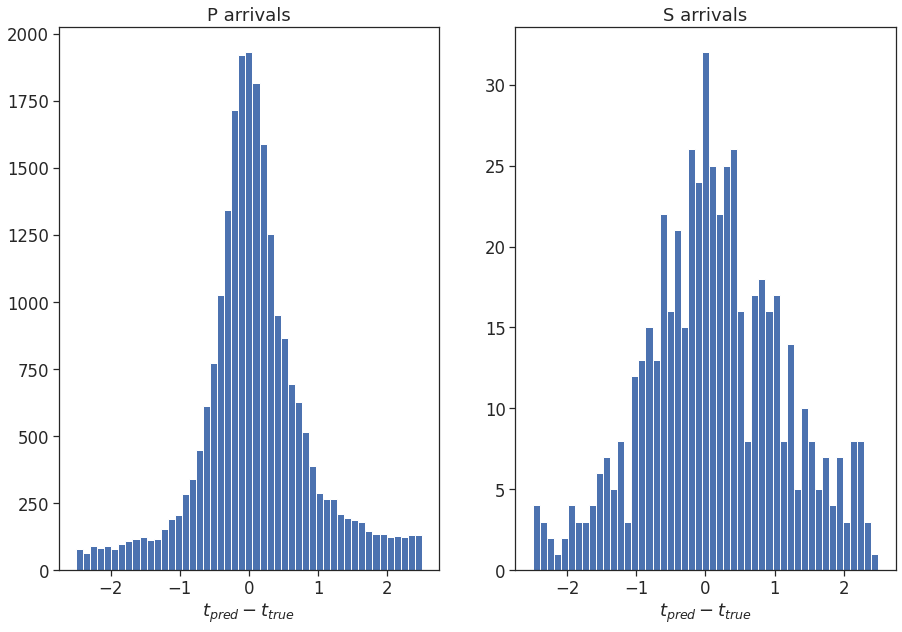

In [34]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(1, 2)

for i, phase in enumerate(["P", "S"]):
    ax = axs[i]
    ax.set_title(f"{phase} arrivals")
    pred_phase = pred[pred["phase_label"] == phase]
    pred_col = f"{phase.lower()}_sample_pred"
    
    diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]
    
    bins = np.linspace(-2.5, 2.5, 50)
    ax.hist(diff, bins=bins)
    ax.set_xlabel("$t_{pred} - t_{true}$")

# Systematic evaluation

In [3]:
results = pd.read_csv("results.csv")

In [4]:
results

,experiment,data,model,lr,version,dev_det_precision,dev_det_recall,dev_det_f1,det_threshold,test_det_precision,...,dev_P_mae_s,dev_S_mean_s,dev_S_std_s,dev_S_mae_s,test_P_mean_s,test_P_std_s,test_P_mae_s,test_S_mean_s,test_S_std_s,test_S_mae_s
0,ethz_basicphaseae_0.0001,ethz,basicphaseae,0.0001,0,0.932951,0.762390,0.839091,0.316741,0.921642,...,0.741057,0.125641,1.322892,0.623818,0.153339,1.767942,0.967179,0.201656,1.309772,0.630289
1,ethz_basicphaseae,ethz,basicphaseae,0.0010,0,0.956396,0.911894,0.933615,0.296525,0.939023,...,0.245943,0.020286,1.167362,0.506161,0.105342,0.774315,0.303190,0.065660,1.241713,0.533804
2,ethz_basicphaseae_0.01,ethz,basicphaseae,0.0100,0,0.500000,1.000000,0.666667,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ethz_cred_0.0001,ethz,cred,0.0001,0,0.903446,0.945485,0.923988,0.077826,0.883105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ethz_cred,ethz,cred,0.0010,0,0.920923,0.923458,0.922189,0.061431,0.890877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ethz_cred_0.01,ethz,cred,0.0100,0,0.898566,0.931718,0.914842,0.108976,0.897549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ethz_eqtransformer_0.0001,ethz,eqtransformer,0.0001,0,0.890923,0.951267,0.920107,0.081692,0.879108,...,0.258739,0.087670,0.602702,0.238549,-0.087721,0.586026,0.266385,0.118618,0.745280,0.250902
7,ethz_eqtransformer,ethz,eqtransformer,0.0010,0,0.855834,0.951267,0.901030,0.030044,0.855084,...,0.107241,0.033169,0.286248,0.124477,-0.017580,0.352667,0.107733,0.055154,0.490219,0.149088
8,ethz_eqtransformer_0.01,ethz,eqtransformer,0.0100,0,0.500000,1.000000,0.666667,0.075654,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ethz_gpd_0.0001,ethz,gpd,0.0001,0,0.928274,0.983480,0.955080,0.962776,0.913747,...,0.417921,0.090863,0.647826,0.396258,-0.237764,0.549809,0.414894,0.144408,0.639184,0.394688


In [10]:
def results_to_array(results, cols, selection, minimize=False):
    data_dict = {data: i for i, data in enumerate(results["data"].unique())}
    model_dict = {model: i for i, model in enumerate(results["model"].unique())}

    n_data = len(results["data"].unique())
    n_model = len(results["model"].unique())
    
    res_array = np.nan * np.zeros((n_data, n_model, len(cols)))
    
    for _, subdf in results.groupby(["data", "model"]):
        if np.isnan(subdf[selection]).all():
            continue
        if minimize:
            i = np.nanargmin(subdf[selection])
        else:
            i = np.nanargmax(subdf[selection])
        row = subdf.iloc[i]
        entry = res_array[data_dict[row["data"]], model_dict[row["model"]]]
        for col_idx, col in enumerate(cols):
            entry[col_idx] = row[col]
    
    return data_dict, model_dict, res_array

In [11]:
def results_to_table(results, cols, selection, labels=None, minimize=False):
    data_dict, model_dict, res_array = results_to_array(results, cols, selection, minimize=minimize)
    
    n_data = len(results["data"].unique())
    n_model = len(results["model"].unique())
    
    inv_data_dict = {v: k for k, v in data_dict.items()}
    inv_model_dict = {v: k for k, v in model_dict.items()}

    header = ""
    header_count = 1
    for j in range(n_model):
        if np.isnan(res_array[:, j]).all():
            print(f"Skipping {inv_model_dict[j]}")
            continue
        header += f" & \multicolumn{{{len(cols)}}}{{|c}}{{{inv_model_dict[j]}}}"
        header_count += 1
    header += f" & \multicolumn{{{len(cols)}}}{{|c}}{{average}} \\\\"
    
    if labels is not None:
        label_str = " & ".join([""] + header_count * labels) + "\\\\"
    else:
        label_str = ""
    
    colspec = "|".join(["c"] + header_count * ["c" * len(cols)])
    tabular = f"\\begin{{tabular}}{{{colspec}}}"
    
    table_str = [tabular, header, label_str, "\\hline"]
    
    for i in range(n_data):
        line = inv_data_dict[i]
        if np.isnan(res_array[i]).all():
            print(f"Skipping {inv_data_dict[i]}")
            continue
        for j in range(n_model):
            if np.isnan(res_array[:, j]).all():
                print(f"Skipping {inv_model_dict[j]}")
                continue
            for col_idx, _ in enumerate(cols):
                line += f" & {res_array[i, j, col_idx]:.2f}"
        
        avg = np.nanmean(res_array[i], axis=0)
        for col_idx, _ in enumerate(cols):
            line += f" & {avg[col_idx]:.2f}"
        
        line += " \\\\"
        table_str.append(line)
    
    table_str.append("\\hline")
    
    line = "average"
    for j in range(n_model):
        if np.isnan(res_array[:, j]).all():
            print(f"Skipping {inv_model_dict[j]}")
            continue
        avg = np.nanmean(res_array[:, j], axis=0)
        
        for col_idx, _ in enumerate(cols):
            line += f" & {avg[col_idx]:.2f}"
    
    line += " \\\\"
    table_str.append(line)    
    table_str.append("\\end{tabular}")
    
    return "\n".join(table_str)

In [7]:
table = results_to_table(results, ["test_det_precision", "test_det_recall", "test_det_f1"], "dev_det_f1", ["P", "R", "F1"])
print(table)

Skipping neic
\begin{tabular}{c|ccc|ccc|ccc|ccc|ccc|ccc|ccc}
 & \multicolumn{3}{|c}{basicphaseae} & \multicolumn{3}{|c}{cred} & \multicolumn{3}{|c}{eqtransformer} & \multicolumn{3}{|c}{gpd} & \multicolumn{3}{|c}{gpdpick} & \multicolumn{3}{|c}{phasenet} & \multicolumn{3}{|c}{average} \\
 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1\\
\hline
ethz & 0.94 & 0.89 & 0.91 & 0.88 & 0.94 & 0.91 & 0.88 & 0.94 & 0.91 & 0.93 & 0.98 & 0.95 & 0.95 & 0.98 & 0.96 & 0.93 & 0.96 & 0.95 & 0.92 & 0.95 & 0.93 \\
geofon & 0.50 & 1.00 & 0.67 & 0.93 & 0.87 & 0.90 & 0.95 & 0.93 & 0.94 & 0.82 & 0.83 & 0.82 & 0.76 & 0.87 & 0.81 & 0.86 & 0.85 & 0.85 & 0.80 & 0.89 & 0.83 \\
instance & 0.87 & 1.00 & 0.93 & 0.95 & 0.95 & 0.95 & 0.94 & 0.97 & 0.95 & 0.96 & 0.94 & 0.95 & 0.96 & 0.94 & 0.95 & 0.96 & 0.93 & 0.95 & 0.94 & 0.95 & 0.95 \\
lendb & 0.51 & 1.00 & 0.68 & 0.98 & 0.94 & 0.96 & 0.98 & 0.93 & 0.96 & 0.93 & 0.84 & 0.88 & 0.91 & 0.86 & 0.89 & 0.93 & 0.88 & 0.90 & 0.87 & 

In [8]:
table = results_to_table(results, ["test_phase_precision", "test_phase_recall", "test_phase_f1"], "dev_phase_f1", ["P", "R", "F1"])
print(table)

Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping lendb
Skipping cred
Skipping cred
Skipping cred
\begin{tabular}{c|ccc|ccc|ccc|ccc|ccc|ccc}
 & \multicolumn{3}{|c}{basicphaseae} & \multicolumn{3}{|c}{eqtransformer} & \multicolumn{3}{|c}{gpd} & \multicolumn{3}{|c}{gpdpick} & \multicolumn{3}{|c}{phasenet} & \multicolumn{3}{|c}{average} \\
 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1 & P & R & F1\\
\hline
ethz & 0.87 & 0.96 & 0.91 & 0.98 & 0.99 & 0.99 & 0.93 & 0.97 & 0.95 & 0.96 & 0.98 & 0.97 & 0.95 & 0.99 & 0.97 & 0.94 & 0.98 & 0.96 \\
geofon & 0.99 & 1.00 & 0.99 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 0.99 & 1.00 & 0.99 & 0.99 & 0.99 & 0.99 & 1.00 & 0.99 \\
instance & 0.91 & 0.97 & 0.94 & 0.96 & 0.98 & 0.97 & 0.92 & 0.97 & 0.95 & 0.95 & 0.98 & 0.97 & 0.94 & 0.98 & 0.96 & 0.94 & 0.98 & 0.96 \\
neic & 0.91 & 0.97 & 0.94 & 0.99 & 0.99 & 0.99 & 0.95 & 0.98 & 0.96 & 0.95 & 0.98 & 0.96 & 0.93 & 0.98 & 0.95 & 0.94 & 0.98 & 0.96 \\
stead & 0.94 & 0

In [12]:
table = results_to_table(results, ["test_P_mean_s", "test_P_std_s", "test_P_mae_s"], "dev_P_std_s", ["$\\mu$", "$\\sigma$", "MAE"], minimize=True)
print(table)

Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping lendb
Skipping cred
Skipping cred
Skipping cred
\begin{tabular}{c|ccc|ccc|ccc|ccc|ccc|ccc}
 & \multicolumn{3}{|c}{basicphaseae} & \multicolumn{3}{|c}{eqtransformer} & \multicolumn{3}{|c}{gpd} & \multicolumn{3}{|c}{gpdpick} & \multicolumn{3}{|c}{phasenet} & \multicolumn{3}{|c}{average} \\
 & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE\\
\hline
ethz & 0.11 & 0.77 & 0.30 & -0.02 & 0.35 & 0.11 & -0.22 & 0.55 & 0.38 & 0.05 & 0.42 & 0.12 & 0.02 & 0.42 & 0.12 & -0.01 & 0.50 & 0.21 \\
geofon & 0.10 & 2.19 & 1.27 & 0.14 & 0.95 & 0.42 & 0.13 & 1.53 & 0.77 & 0.21 & 1.55 & 0.72 & 0.14 & 1.28 & 0.58 & 0.15 & 1.50 & 0.75 \\
instance & -0.04 & 1.42 & 0.56 & -0.06 & 1.33 & 0.43 & -0.27 & 1.30 & 0.64 & -0.11 & 1.29 & 0.43 & -0.10 & 1.32 & 0.46 & -0.12 & 1.33 & 0.51 \\
neic & 0.20 & 1.93 & 1.09 & 0.00 & 0.39 & 0.06 & 0.10 & 1.49 & 0.79 &

In [13]:
table = results_to_table(results, ["test_S_mean_s", "test_S_std_s", "test_S_mae_s"], "dev_S_std_s", ["$\\mu$", "$\\sigma$", "MAE"], minimize=True)
print(table)

Skipping cred
Skipping cred
Skipping cred
Skipping cred
Skipping lendb
Skipping cred
Skipping cred
Skipping cred
\begin{tabular}{c|ccc|ccc|ccc|ccc|ccc|ccc}
 & \multicolumn{3}{|c}{basicphaseae} & \multicolumn{3}{|c}{eqtransformer} & \multicolumn{3}{|c}{gpd} & \multicolumn{3}{|c}{gpdpick} & \multicolumn{3}{|c}{phasenet} & \multicolumn{3}{|c}{average} \\
 & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE & $\mu$ & $\sigma$ & MAE\\
\hline
ethz & 0.07 & 1.24 & 0.53 & 0.06 & 0.49 & 0.15 & 0.37 & 0.79 & 0.54 & 0.13 & 0.57 & 0.20 & 0.10 & 0.56 & 0.19 & 0.14 & 0.73 & 0.32 \\
geofon & 0.09 & 2.02 & 1.25 & 0.30 & 1.35 & 0.80 & -0.03 & 1.30 & 0.77 & 0.15 & 1.27 & 0.71 & 0.30 & 1.71 & 1.02 & 0.16 & 1.53 & 0.91 \\
instance & 0.26 & 1.28 & 0.55 & 0.24 & 1.26 & 0.44 & 0.12 & 1.28 & 0.61 & 0.25 & 1.22 & 0.45 & 0.26 & 1.26 & 0.48 & 0.23 & 1.26 & 0.51 \\
neic & 0.11 & 1.50 & 0.82 & 0.00 & 0.35 & 0.08 & 0.10 & 1.21 & 0.68 & 0.19 & 

## Residual plot

In [33]:
def residual_matrix(phase, results, pred_path, selection, lim=2):
    data_dict, model_dict, res_array = results_to_array(results, [f"test_{phase}_mean_s"], selection, minimize=True)
    res_array = res_array[:, :, 0]
    
    n_data = len(results["data"].unique())
    n_model = len(results["model"].unique())
    
    inv_data_dict = {v: k for k, v in data_dict.items()}
    inv_model_dict = {v: k for k, v in model_dict.items()}
    
    true_n_data = np.sum((~np.isnan(res_array)).any(axis=1))
    true_n_model = np.sum((~np.isnan(res_array)).any(axis=0))
    
    fig = plt.figure(figsize=(15, 15))
    axs = fig.subplots(true_n_data, true_n_model, sharex=True, sharey=False, gridspec_kw={"hspace": 0.05, "wspace": 0.05})
    
    true_i = 0
    for i in range(n_data):
        if np.isnan(res_array[i]).all():
            continue
        true_j = 0
        for j in range(n_model):
            if np.isnan(res_array[:, j]).all():
                continue
            data, model = inv_data_dict[i], inv_model_dict[j]
            mask = np.logical_and(results["model"] == model, results["data"] == data)
            
            subdf = results[mask]
            lr_idx = np.nanargmin(subdf[selection])
            row = subdf.iloc[lr_idx]
            
            axs[true_i, true_j].set_yticklabels([])
            axs[true_i, true_j].set_xlim(-lim, lim)
            
            pred_path_loc = pred_path / row["experiment"] / f"version_{row['version']}" / "test_task23.csv"
            if not pred_path_loc.is_file():
                true_j += 1
                continue
            pred = pd.read_csv(pred_path_loc)
            
            pred_phase = pred[pred["phase_label"] == phase]
            pred_col = f"{phase.lower()}_sample_pred"

            diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]
            
            bins = np.linspace(-lim, lim, 50)
            axs[true_i, true_j].hist(diff, bins=bins)
            
            axs[0, true_j].set_title(model)
            
            outliers = np.abs(diff) > lim
            frac_outliers = np.sum(outliers) / len(diff)
            diff[outliers] = lim
            std_outlierfree = np.std(diff)
            axs[true_i, true_j].text(0.98, 0.98, f"{frac_outliers:.2f}", transform=axs[true_i, true_j].transAxes, ha="right", va="top")
            # axs[true_i, true_j].text(0.98, 0.87, f"{std_outlierfree:.2f}", transform=axs[true_i, true_j].transAxes, ha="right", va="top")
            
            true_j += 1
            
        axs[true_i, 0].set_ylabel(data)
        
        true_i += 1
    
    for ax in axs[-1]:
        ax.set_xlabel("$t_{pred} - t_{true}$")
    
    return fig

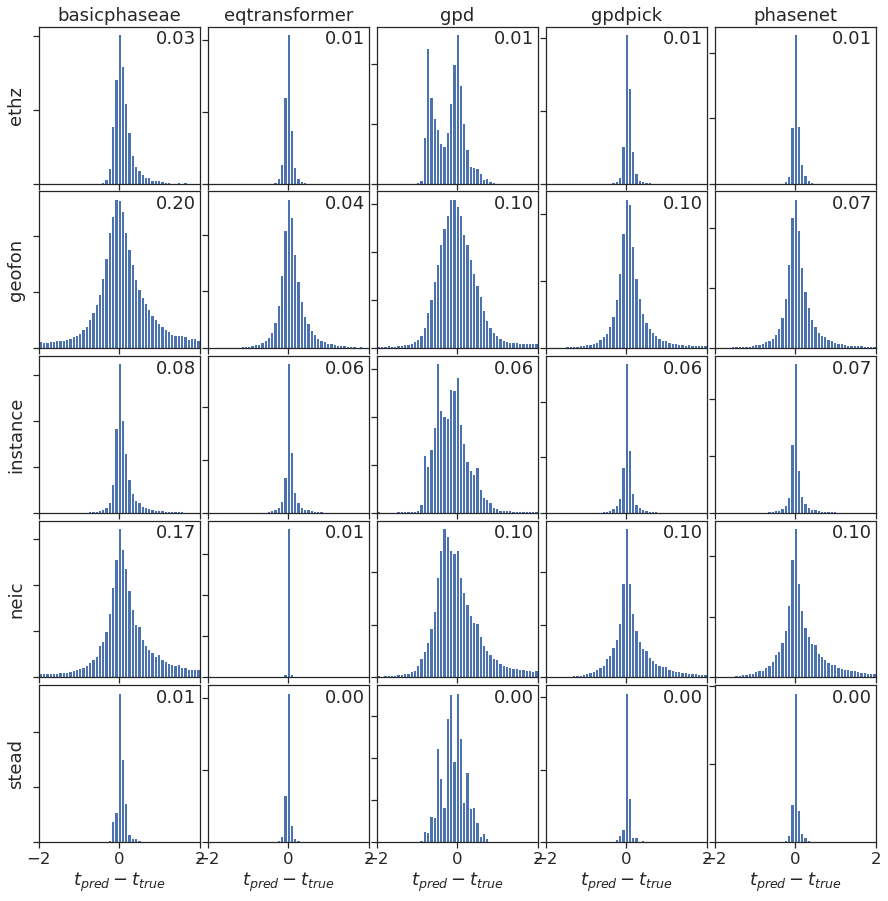

In [34]:
fig = residual_matrix("P", results, Path("pred"), "dev_P_std_s")
fig.savefig("test_P_diff.eps", bbox_inches="tight")

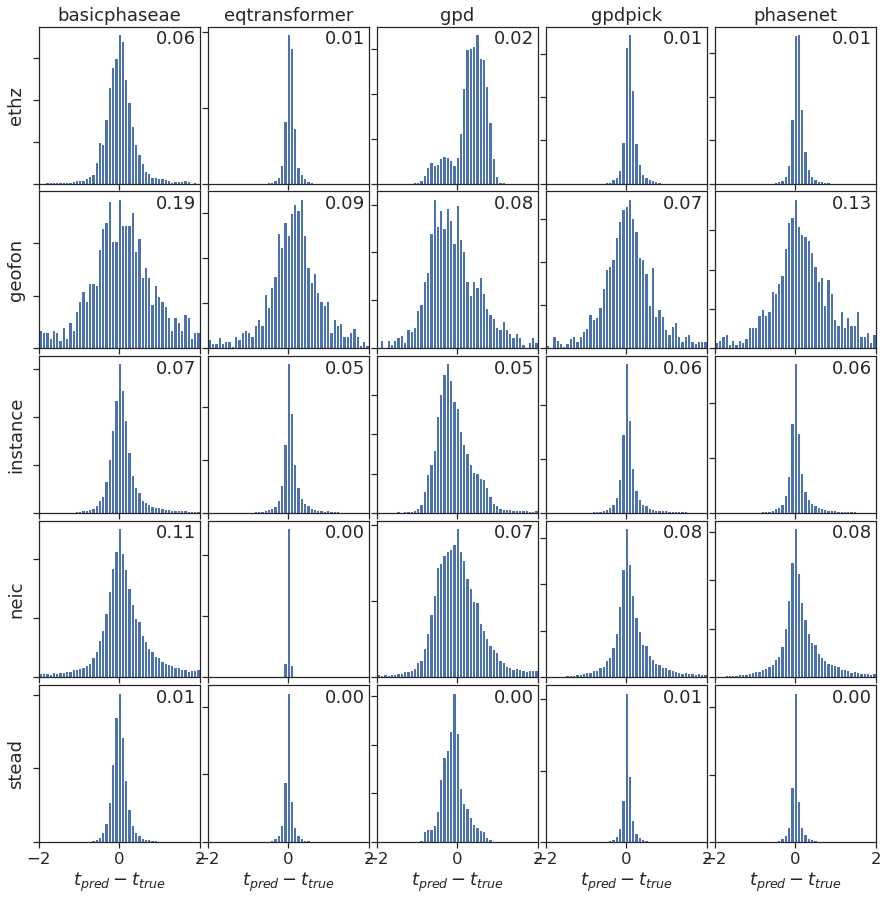

In [35]:
fig = residual_matrix("S", results, Path("pred"), "dev_S_std_s")
fig.savefig("test_S_diff.eps", bbox_inches="tight")